In [ ]:
!pip install keras==2.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.9.0 which is incompatible.


In [ ]:
!pip install tensorflow==2.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 41.4 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: tensorboard-data-serve

In [ ]:
!pip install patchify    #To install and import other mentioned libraries  in code
!pip install segmentation_models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
#Import all library needed
import numpy as np
import pandas as pd
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
import os
import time
from sklearn.datasets import load_iris

#Confusion Matrix Visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
### 1. Link notebook with google drive and access data from your personal Gdrive
from google.colab import drive
drive.mount('/content/gdrive')

### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
# Set the data path for data set and model location
dataset_dir = "/content/gdrive/MyDrive/Semester 8/Bio Modeling&Simulation/Dataset/Heart Disease/"
model_loc = "/content/gdrive/MyDrive/Semester 8/Bio Modeling&Simulation/Dataset/"

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir + 'heart.csv')



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['heart.csv']


In [ ]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.

data.head() #display first 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?

# The purpose of setting categorical variables in a dataset and then casting them to the object data type
# using the `astype()` function is to treat them as discrete categories rather than numerical values.
# This can help in performing operations like grouping, sorting, and analysis more accurately and efficiently.

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

In [ ]:
### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function
# this one is like using checkboxes
data = pd.get_dummies(data, drop_first=True)

In [ ]:
### 6. Explain line 3,4 and 5 and print the shape of x and y

y = data['target'].values #take target value
y = y.reshape(y.shape[0],1) #reshape y array into 1 dimension
x = data.drop(['target'],axis=1)#drop 'target' in x data

### Answer ###
### Line 3 extracts the target variable from the dataset `data` and assigns its values to the variable `y`.
### Line 4 reshapes the `y` array into a single dimension.
### Line 5 removes the column 'target' from the dataset `data` and assigns the resulting DataFrame to the variable `x`.

### To print the shape of `x` and `y`, you can use the `.shape` attribute.
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (303, 21)
Shape of y: (303, 1)


In [ ]:
y.size

303

In [ ]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset

# Create a simple dataset
data = pd.DataFrame({'A': [10, 20, 30], 'B': [100, 200, 300], 'C': [1000, 2000, 3000]})
print('Original dataset:')
print(data)

# Normalize data (range 0 - 1)
minx = np.min(data)
maxx = np.max(data)
data_norm = (data - minx) / (maxx - minx)
print('\nNormalized dataset:')
print(data_norm)

Original dataset:
    A    B     C
0  10  100  1000
1  20  200  2000
2  30  300  3000

Normalized dataset:
          A         B         C
0  0.000000  0.030100  0.331104
1  0.003344  0.063545  0.665552
2  0.006689  0.096990  1.000000


In [ ]:
### 8. Describe the heart dataset after implementing the min max normalization
#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()


# Description
# The data has become within the range of 0-1, this will prevent oevrfitting
# and have a higher accuracy

,age,trestbps,chol,thalach,oldpeak,slope,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.111702,0.257092,0.413121,0.265957,0.004078,0.000000,0.001773,0.000000,0.000000,0.001773,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.001773,0.000000,0.0
1,0.065603,0.230496,0.443262,0.331560,0.006206,0.000000,0.001773,0.000000,0.001773,0.000000,...,0.001773,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0
2,0.072695,0.230496,0.361702,0.304965,0.002482,0.003546,0.000000,0.001773,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0
3,0.099291,0.212766,0.418440,0.315603,0.001418,0.003546,0.001773,0.001773,0.000000,0.000000,...,0.001773,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0
4,0.101064,0.212766,0.627660,0.289007,0.001064,0.003546,0.000000,0.000000,0.000000,0.000000,...,0.001773,0.0,0.001773,0.0,0.0,0.0,0.0,0.000000,0.001773,0.0


In [ ]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
# re-create train and validation set
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(217, 21)
(55, 21)
(31, 21)


In [ ]:
### 10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons,
### respectively, and softmax and sigmoid activation functions?

# model = Sequential() #Allow us to create model layer by layer
# model.add(Dense(64, input_dim=21, activation='ReLU')) #Softmax turn number data into probabilities which sum to 1
# model.add(Dense(32, activation='ReLU'))
# model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
# model.compile(loss='mse', optimizer=optimizer, metrics=['acc'])
# model.summary()

def create_model(activation='softmax', optimizer='adam', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(64, input_dim=21, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    if optimizer == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'rmsprop':
        optimizer = tf.keras.optimizers.RMSprop(learning_rate=learning_rate, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False)

    model.compile(loss='mse', optimizer=optimizer, metrics=['acc'])
    return model

### Answer ###
### In a neural network with layers of 64, 32, and 1 neurons, employing the Sequential() function and using softmax and sigmoid activation functions,
### each layer serves a distinct purpose. The initial layer, with 64 neurons, acts as the input layer, processing input data with ReLU activation.
### The subsequent layer, featuring 32 neurons, serves as a hidden layer, adding complexity with ReLU activation. The final layer, consisting of a single neuron,
### serves as the output layer, producing the final output using a sigmoid activation function, suitable for binary classification tasks.

In [ ]:
### 11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01,
### and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?

# model.compile(loss='mse',
#               optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='rmsprop'),
#               metrics=['acc'])

# model.compile(loss='mse',
#             optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False, use_ema=False,name="rmsprop"),
#             metrics=['acc']
# )

# model.compile(loss='mse',
#               optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, use_ema=False,name="adamax"),
#               metrics=['acc']
# )

### Answer ###
### The code compiles a neural network model using mean squared error as the loss function for regression tasks,
### the Adam optimizer with a learning rate of 0.01 for efficient weight adjustment, and accuracy as the metric
### to evaluate the model's performance in classification tasks.

In [ ]:
# Create KerasClassifier
keras_model = KerasClassifier(build_fn=create_model, epochs=10, verbose=0)

<ipython-input-13-cbdf23ffc8b0>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_model = KerasClassifier(build_fn=create_model, epochs=10, verbose=0)


In [ ]:
# Define the parameter grid
param_dist = {
        'activation': ['relu', LeakyReLU()],
        'optimizer': ['adamax', 'rmsprop'],
        'batch_size': [32, 64],
        'learning_rate': [0.001, 0.0001]
}

In [ ]:
# start the model training
# output = []
# early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
# checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
# reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
# callbacks_list = [early]

# output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=64, verbose=1, callbacks=callbacks_list)

In [ ]:
# Load dataset
iris = load_iris()
x, y = iris.data, iris.target

In [ ]:
# Perform random search
random_search = RandomizedSearchCV(estimator=keras_model, param_distributions=param_dist, n_iter=10, cv=3)

In [ ]:
# Perform grid search
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7e05763efeb0>,
                   param_distributions={'activation': ['relu',
                                                       <keras.layers.activation.leaky_relu.LeakyReLU object at 0x7e05763ef7f0>],
                                        'batch_size': [32, 64],
                                        'learning_rate': [0.001, 0.0001],
                                        'optimizer': ['adamax', 'rmsprop']})

In [ ]:
# Print the best parameters
print("Best parameters found: ", random_search.best_params_)

Best parameters found:  {'optimizer': 'rmsprop', 'learning_rate': 0.001, 'batch_size': 32, 'activation': <keras.layers.activation.leaky_relu.LeakyReLU object at 0x7e05763ef7f0>}


In [ ]:
# Summarize results
print("Best: %f using %s" % (random_search.best_score_, random_search.best_params_))
means = random_search.cv_results_['mean_test_score']
stds = random_search.cv_results_['std_test_score']
params = random_search.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.570967 using {'optimizer': 'rmsprop', 'learning_rate': 0.001, 'batch_size': 32, 'activation': <keras.layers.activation.leaky_relu.LeakyReLU object at 0x7e05763ef7f0>}
0.561834 (0.060427) with: {'optimizer': 'adamax', 'learning_rate': 0.0001, 'batch_size': 32, 'activation': <keras.layers.activation.leaky_relu.LeakyReLU object at 0x7e05763ef7f0>}
0.557204 (0.062298) with: {'optimizer': 'adamax', 'learning_rate': 0.001, 'batch_size': 64, 'activation': 'relu'}
0.543569 (0.036376) with: {'optimizer': 'adamax', 'learning_rate': 0.001, 'batch_size': 32, 'activation': <keras.layers.activation.leaky_relu.LeakyReLU object at 0x7e05763ef7f0>}
0.570967 (0.072911) with: {'optimizer': 'rmsprop', 'learning_rate': 0.001, 'batch_size': 32, 'activation': <keras.layers.activation.leaky_relu.LeakyReLU object at 0x7e05763ef7f0>}
0.543569 (0.036376) with: {'optimizer': 'rmsprop', 'learning_rate': 0.001, 'batch_size': 32, 'activation': 'relu'}
0.515791 (0.054517) with: {'optimizer': 'rmsprop', 'learn

1/1 [==============================] - 0s 60ms/step


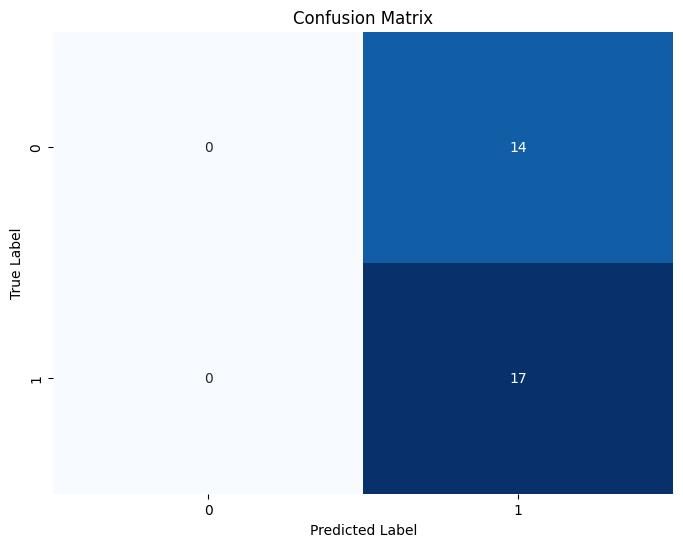

True Positives (TP): 17
False Positives (FP): 14
True Negatives (TN): 0
False Negatives (FN): 0


In [ ]:
# Get best model from grid search
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(x_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Extract TP, FP, TN, FN values from confusion matrix
TP = conf_matrix[1, 1]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]
FN = conf_matrix[1, 0]

print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("True Negatives (TN):", TN)
print("False Negatives (FN):", FN)

In [ ]:
# Measure the time
start_time = time.time()
random_search.fit(x_train, y_train)
end_time = time.time()

In [ ]:
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Random search took {elapsed_time:.2f} seconds")

Random search took 37.84 seconds
